C:\Users\Administrator\AppData\Local\Temp\2\ipykernel_13576\4002376126.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.arange(len(pressure_brackets)), label='Pressure Brackets',orientation='horizontal')


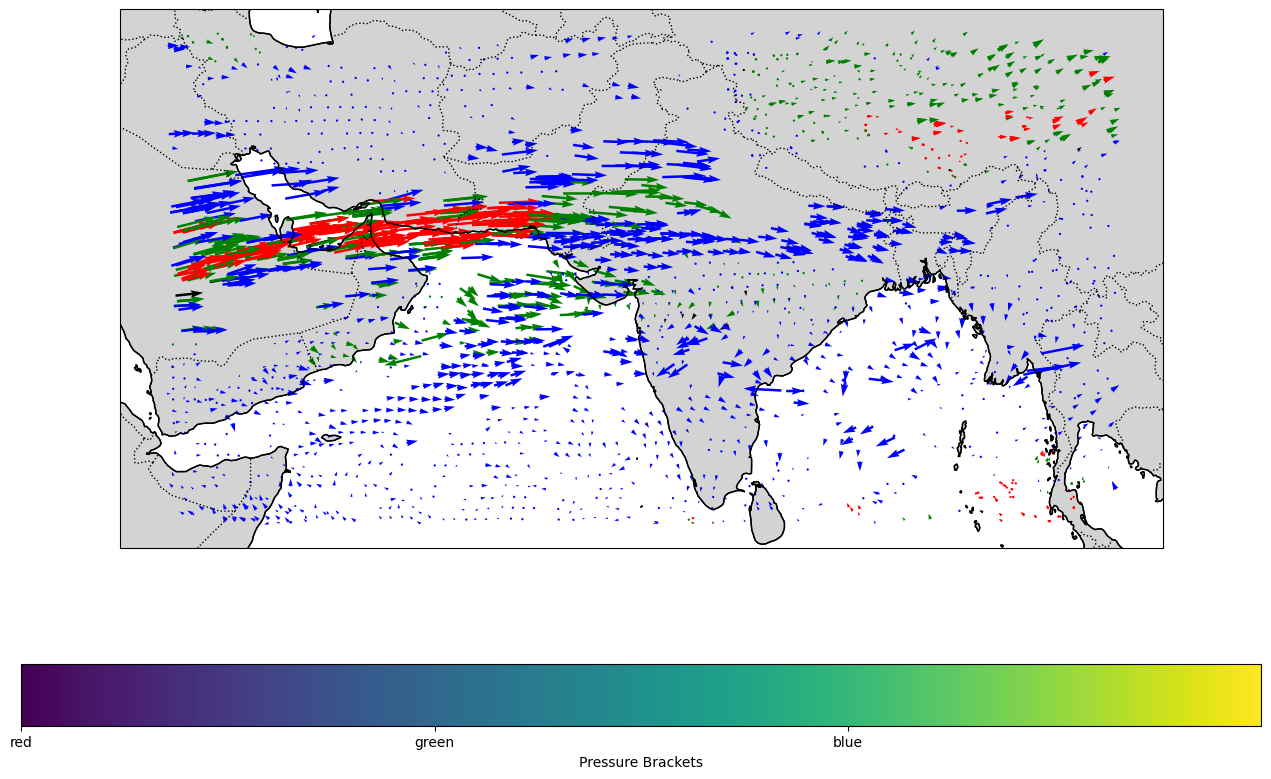

In [5]:
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import cartopy.crs as ccrs
import cartopy.feature as cfeature

INPUT_AMV_FILE = 'T:/Mohsin/SATMET_PRODUCTS/GII_PRODUCT/2024-02-05__06-30__AMV.bufr'

df = pdbufr.read_bufr(INPUT_AMV_FILE, columns=("pressure", "latitude", "longitude", "airTemperature", "windSpeed", "windDirection", "u", "v"))

df = df[
    (df['pressure'] > 14999)
    & (df['pressure'] < 60001)
    & (df['latitude'] > 7.21)
    & (df['latitude'] < 37.45)
    & (df['longitude'] > 43.752)
    & (df['longitude'] < 102.364)
]

# Categorize data into pressure brackets
pressure_brackets = [
    (15000, 25000),
    (25100, 35000),
    (35100, 60000)
]

pressure_labels = ['red', 'green', 'blue']

df['pressure_color'] = np.select(
    [((df['pressure'] >= low) & (df['pressure'] <= high)) for low, high in pressure_brackets],
    pressure_labels, default='black'
)

# Convert wind direction and speed to cartesian components (u and v)
windu = -df['windSpeed'] * np.sin(np.radians(df['windDirection']))
windv = -df['windSpeed'] * np.cos(np.radians(df['windDirection']))

# Create a cartopy map with PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 16))

# Plot wind vectors with different colors based on pressure brackets
quiver = ax.quiver(df['longitude'], df['latitude'], windu, windv, color=df['pressure_color'], transform=ccrs.PlateCarree())

# Add coastlines and other features to the map
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')

# Create a ScalarMappable to map pressure brackets to colors using 'viridis' colormap
sm = ScalarMappable(cmap=plt.get_cmap('viridis'), norm=plt.Normalize(vmin=0, vmax=len(pressure_brackets)))
sm.set_array([])  # An empty array, as we only need the normalization

# Add color bar with pressure_labels and 'viridis' colormap
cbar = plt.colorbar(sm, ticks=np.arange(len(pressure_brackets)), label='Pressure Brackets',orientation='horizontal')
cbar.set_ticklabels(pressure_labels)

plt.show()
